<a href="https://colab.research.google.com/github/flavio641/Modelos_Aprendizados_Maquinas/blob/main/ArvoreDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/dt.csv')
df

,Age,NumOfProducts,IsActiveMember,Exited
0,42,1,1,1
1,41,1,1,0
2,42,3,0,1
3,39,2,0,0
4,43,1,1,0
...,...,...,...,...
9995,39,2,0,0
9996,35,1,1,0
9997,36,1,1,1
9998,42,2,0,1


# ***Separar variável preditiva e variável resposta***

In [3]:
X = df.drop('Exited', axis= 1)
y = df.Exited

# ***Análise Preliminares***

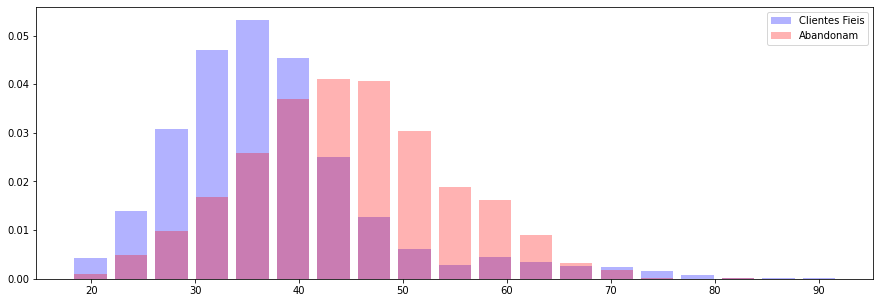

In [4]:
mi = X.Age.min()
ma = X.Age.max()
bins = np.linspace(mi, ma, 20)
plt.figure(figsize= (15,5))
plt.hist(X.loc[y==0].Age, bins = bins, rwidth= 0.80, color = 'b', alpha= .3, density= True, label= 'Clientes Fieis')
plt.hist(X.loc[y==1].Age, bins = bins, rwidth = 0.80, color = 'r', alpha= .3, density= True, label= 'Abandonam')
plt.legend()

In [5]:
# Proporções de Pessoas que abandonam a empresa
y.loc[X.Age >= 40].mean()

0.3588337901819088

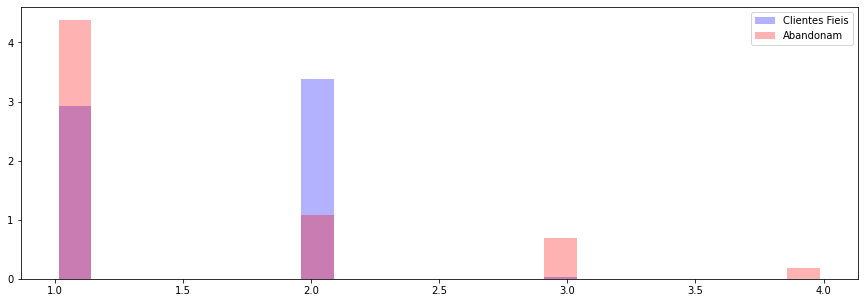

In [6]:
mi = X.NumOfProducts.min()
ma = X.NumOfProducts.max()
bins = np.linspace(mi, ma, 20)
plt.figure(figsize= (15,5))
plt.hist(X.loc[y==0].NumOfProducts, bins = bins, rwidth= 0.80, color = 'b', alpha= .3, density= True, label= 'Clientes Fieis')
plt.hist(X.loc[y==1].NumOfProducts, bins = bins, rwidth = 0.80, color = 'r', alpha= .3, density= True, label= 'Abandonam')
plt.legend()

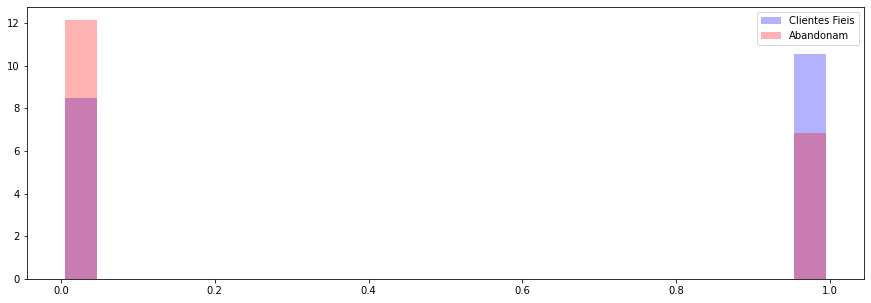

In [7]:
mi = X.IsActiveMember.min()
ma = X.IsActiveMember.max()
bins = np.linspace(mi, ma, 20)
plt.figure(figsize= (15,5))
plt.hist(X.loc[y==0].IsActiveMember, bins = bins, rwidth= 0.80, color = 'b', alpha= .3, density= True, label= 'Clientes Fieis')
plt.hist(X.loc[y==1].IsActiveMember, bins = bins, rwidth = 0.80, color = 'r', alpha= .3, density= True, label= 'Abandonam')
plt.legend()

# ***Divisão em Conjunto Treino e Conjuto Teste***

In [29]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(X,y, test_size= 0.3, random_state= 61658)

# ***Definição dos Parâmetros da validação Cruzada***

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes' : [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state= 61658), # Primeiro argumento: o Modelo
    params,                                      # Segundo Argumento: Parâmetros
    cv = 10,                                     # Argumento cv: Qtd de folds
    scoring = 'roc_auc',                         # Argumento scoring: Métricas 
    verbose = 5                                  # Argumento verbose: mostra na tela                                 
)

# ***Encontrar o melhor modelo nos dados de treino na validação cruzada***

In [32]:
grid.fit(x_treino, y_treino)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10] END .criterion=gini, max_leaf_nodes=4;, score=0.756 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=4;, score=0.731 total time=   0.0s
[CV 3/10] END .criterion=gini, max_leaf_nodes=4;, score=0.756 total time=   0.0s
[CV 4/10] END .criterion=gini, max_leaf_nodes=4;, score=0.757 total time=   0.0s
[CV 5/10] END .criterion=gini, max_leaf_nodes=4;, score=0.762 total time=   0.0s
[CV 6/10] END .criterion=gini, max_leaf_nodes=4;, score=0.738 total time=   0.0s
[CV 7/10] END .criterion=gini, max_leaf_nodes=4;, score=0.715 total time=   0.0s
[CV 8/10] END .criterion=gini, max_leaf_nodes=4;, score=0.726 total time=   0.0s
[CV 9/10] END .criterion=gini, max_leaf_nodes=4;, score=0.730 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=4;, score=0.756 total time=   0.0s
[CV 1/10] END .criterion=gini, max_leaf_nodes=8;, score=0.818 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,
                                            1024, 2048]},
             scoring='roc_auc', verbose=5)

# ***Qual foi o melhor parâmetro ou modelo***

In [33]:
grid.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 32}

# ***Qual foi o melhor Score***

In [34]:
grid.best_score_

0.8275774006882053

# ***Vamos Usar o Modelo no Conjunto de Teste***

In [35]:
y_pred = grid.predict_proba(x_teste)[:, 1]
y_pred

array([0.07399577, 0.13777778, 0.03446502, ..., 0.13544018, 0.03446502,
       0.03446502])

# ***Curva Roc***

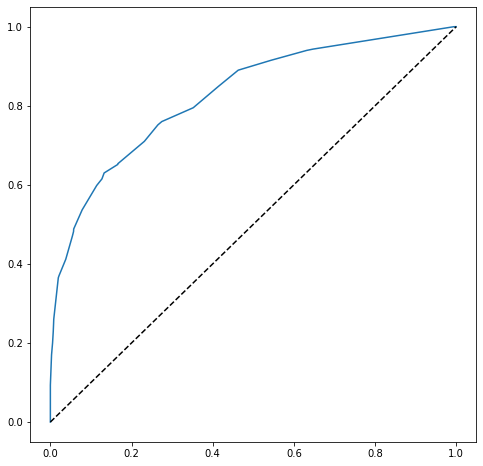

In [38]:
from sklearn.metrics import roc_curve
fpr, tpr, ths = roc_curve(y_teste, y_pred)
plt.figure(figsize= (8,8))
plt.plot(fpr, tpr)
plt.plot((0,1), (0,1), 'k--')